# 1. Install Dependencies and Setup

In [6]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl (1.9 kB)


You should consider upgrading via the 'c:\users\varun\onedrive\desktop\opencv\deep_learning\imageclassification\imageclassification\scripts\python.exe -m pip install --upgrade pip' command.


In [8]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.3
certifi                      2024.7.4
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.4.0
google-auth                  2.31.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.64.1
h5py                         3.11.0
idna                         3.7
importlib-metadata           8.0.0
importlib-resources          6.4.0
ipykernel                    6.29.5
ipy

You should consider upgrading via the 'c:\users\varun\onedrive\desktop\opencv\deep_learning\imageclassification\imageclassification\scripts\python.exe -m pip install --upgrade pip' command.


In [10]:
import tensorflow as tf
import os

In [14]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [28]:
import cv2
import imghdr #check image file extensions
import matplotlib.pyplot as plt

In [18]:
data_dir = 'data' 

In [22]:
os.listdir(data_dir)

['happy', 'sad']

In [24]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [33]:
img = cv2.imread(os.path.join(data_dir, 'happy', '_happy_jumping_on_beach-40815.jpg'))
img.shape

(213, 320, 3)

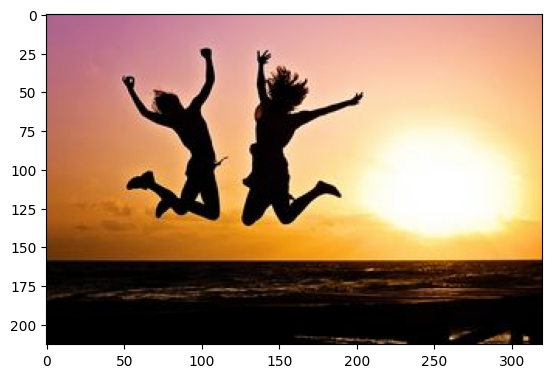

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [26]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] #acceptable image extensions

In [39]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)): #looping through every single image
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path) 
            if tip not in image_exts: #check for the extensions in image_path
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\.ipynb_checkpoints


# 3. Load Data

In [41]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [53]:
data = tf.keras.utils.image_dataset_from_directory('data') 
#create a image dataset on the fly 
#also preprocess the data images of class_a and class_b

Found 171 files belonging to 2 classes.


In [55]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [59]:
data_iterator = data.as_numpy_iterator() #converts data object into numpy iterator

In [63]:
data_iterator

In [81]:
batch = data_iterator.next() #loop through the data iterator rerun to get another batch

In [91]:
#images representation in numpy arrays
batch[0].shape
#batch size -> 32
#image size -> (256, 256) 
#channels -> 3
#more information go -> tf.keras.utils.image_dataset_from_directory??

(32, 256, 256, 3)

In [93]:
batch[1] 
#labels for happy or sad

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

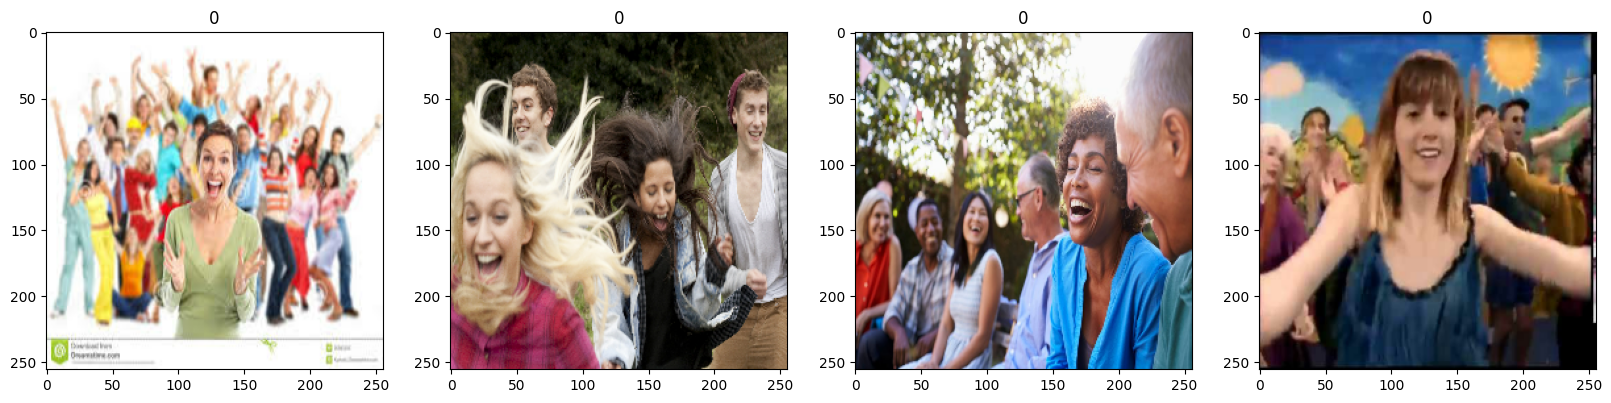

In [95]:
#to check which 0,1 is assigned to which class of images sad, sorry
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #plot four diff plots into one graph
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#class 1-> sad
#class 2-> happy

# 4. Scale Data

In [97]:
data = data.map(lambda x,y: (x/255, y))
#x -> numpy representation of images
#y -> labels 0, 1
#preprocess images into 0 and 1

In [103]:
batch = data.as_numpy_iterator().next()

In [113]:
batch[0].max() #data scaled

1.0

# 5. Split Data

In [124]:
len(data)

6

In [152]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) #evaluation of model during training
test_size = int(len(data)*.1)+1

In [154]:
train_size + val_size + test_size

6

In [166]:
#allocating the data 
#take the data and allocates to it 
#skip the data which already taken by another split
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [168]:
len(test)

1

# 6. Build Deep Learning Model

In [176]:
from tensorflow.keras.models import Sequential #sequenital api one input and one output
#use functional for many inputs and many outputs
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [178]:
model = Sequential() #use of sequential model api

In [180]:
#adding conv2D and maxpooling
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
#input shape -> image resolution with 3 color channels
#relu activation -> values below will be converted to zero but positive values will preserved at it is
model.add(MaxPooling2D())
#check the max value of conv2D layer

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#condense to the single value of dense layer
model.add(Flatten())

model.add(Dense(256, activation='relu')) #256 neurons as output
model.add(Dense(1, activation='sigmoid')) #1 neurons as output for binary classification

In [182]:
#optimiser -> adam
#loss -> BinaryCrossentropy for binary classification
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [184]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [186]:
logdir='logs'

In [188]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [190]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 4s 749ms/step - loss: 0.7430 - accuracy: 0.4922 - val_loss: 0.6611 - val_accuracy: 0.5312
Epoch 2/20
4/4 [==============================] - 4s 726ms/step - loss: 0.6092 - accuracy: 0.5703 - val_loss: 0.5442 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 3s 710ms/step - loss: 0.5519 - accuracy: 0.6484 - val_loss: 0.5425 - val_accuracy: 0.8125
Epoch 4/20
4/4 [==============================] - 3s 716ms/step - loss: 0.4483 - accuracy: 0.8359 - val_loss: 0.4335 - val_accuracy: 0.9062
Epoch 5/20
4/4 [==============================] - 4s 725ms/step - loss: 0.3874 - accuracy: 0.8672 - val_loss: 0.4452 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 4s 762ms/step - loss: 0.2858 - accuracy: 0.8984 - val_loss: 0.2442 - val_accuracy: 0.9375
Epoch 7/20
4/4 [==============================] - 4s 729ms/step - loss: 0.3420 - accuracy: 0.8672 - val_loss: 0.2709 - val_accuracy: 0.8750
Epoch 8/20
4/4 [====

In [194]:
hist.history

{'loss': [0.7430096864700317,
  0.6092421412467957,
  0.5518753528594971,
  0.44827935099601746,
  0.38735222816467285,
  0.2857610881328583,
  0.3420259356498718,
  0.23664794862270355,
  0.197689488530159,
  0.16993892192840576,
  0.12711521983146667,
  0.07651565223932266,
  0.051663562655448914,
  0.18030297756195068,
  0.08869326114654541,
  0.05640881136059761,
  0.07968936860561371,
  0.04806334525346756,
  0.027790473774075508,
  0.014468139037489891],
 'accuracy': [0.4921875,
  0.5703125,
  0.6484375,
  0.8359375,
  0.8671875,
  0.8984375,
  0.8671875,
  0.9296875,
  0.921875,
  0.9609375,
  0.9609375,
  0.96875,
  0.9921875,
  0.8984375,
  0.9765625,
  0.9921875,
  0.9921875,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6610593795776367,
  0.544188380241394,
  0.5424857139587402,
  0.4334716796875,
  0.4451822340488434,
  0.24424563348293304,
  0.2708702087402344,
  0.2863670885562897,
  0.19799910485744476,
  0.09064042568206787,
  0.10526835173368454,
  0.10574670881032944,
  0.17

# 8. Plot Performance

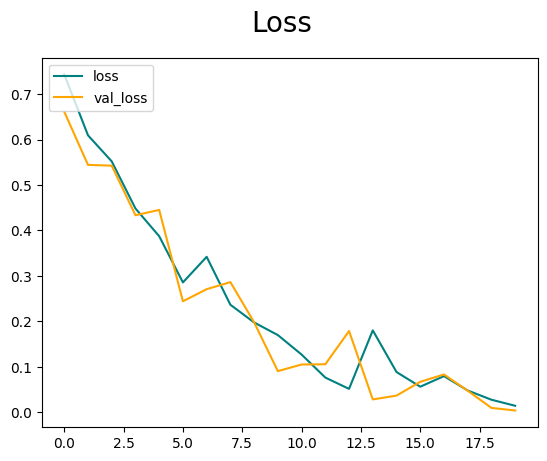

In [196]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

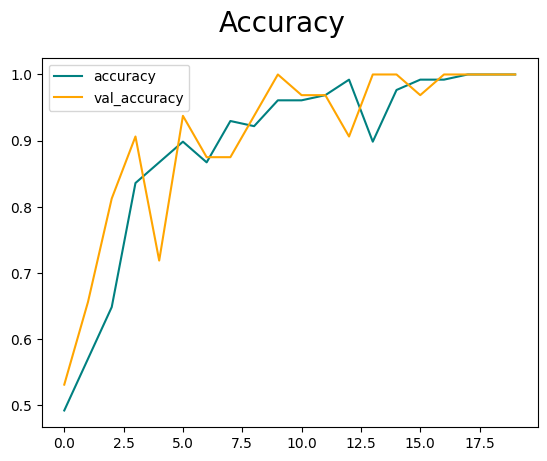

In [198]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [200]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [202]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [204]:
len(test)

1

In [206]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 115ms/step


In [214]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


# 10. Test

In [216]:
import cv2

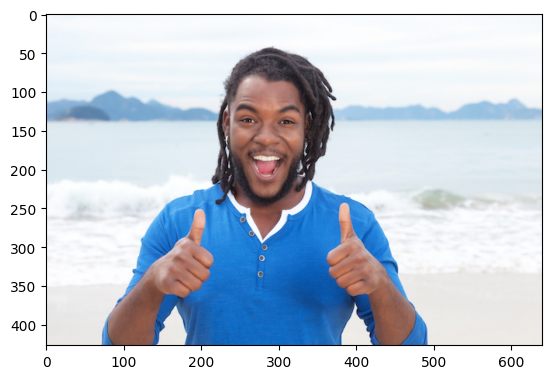

In [244]:
img = cv2.imread('happytest.jpg') #new image not used in training
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

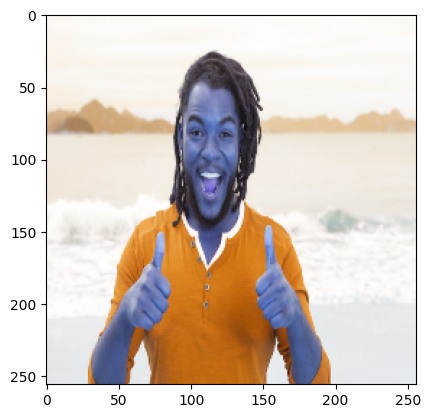

In [246]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [248]:
resize.shape

TensorShape([256, 256, 3])

In [250]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [252]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [254]:
yhat #sad 50% cutoff

array([[2.2076012e-05]], dtype=float32)

In [256]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [258]:
from tensorflow.keras.models import load_model

In [260]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\varun\OneDrive\Desktop\opencv\deep_learning\ImageClassification\imageclassification\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [264]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [266]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


array([[2.2076012e-05]], dtype=float32)